In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [48]:
df = pd.read_csv('data/data_fail.csv')
print(df.shape)
df.head()

(5489, 91)


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,100.0,9.784107e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,100.0,2.076417e-314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,100.0,6.394443e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,100.0,6.040397e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,100.0,1.019657e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Intentamos eliminar los registros que tienen NaN alguna de las columnas smart

In [49]:
columnas=df.columns
columnas_smart=[]
for i in columnas:
    if i[:5]=='smart':
        columnas_smart.append(i)
df_sin_nan = df.dropna(subset=columnas_smart)
df_sin_nan    

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw


Observamos que si hacemos esto, nos quedamos sin registros

In [50]:
failed_hdds = df.loc[df.failure==1]["serial_number"]
failed_hdds.describe()

count          214
unique         205
top       Z300GQAF
freq             2
Name: serial_number, dtype: object

In [51]:
fallas=df.loc[df.failure==1]

In [52]:
doble_falla=fallas.groupby("serial_number")['serial_number'].count().sort_values(ascending=False).head(9).index
doble_falla

Index(['Z300GQAF', 'W3006E5B', 'W300J9JA', 'Z300KHN0', 'Z3015V4D',
       'PL1311LAG2B1NH', 'Z300ZSJQ', 'Z300GYM0', 'Z3001J37'],
      dtype='object', name='serial_number')

In [53]:
registros_a_eliminar=[]
for i in doble_falla:
    aux=df['serial_number'].loc[df.serial_number==i][df.failure==1].index
    registros_a_eliminar.append(max(aux))
    print(aux)
print(registros_a_eliminar)

Int64Index([3525, 3649], dtype='int64')
Int64Index([153, 344], dtype='int64')
Int64Index([3415, 3539], dtype='int64')
Int64Index([106, 297], dtype='int64')
Int64Index([121, 312], dtype='int64')
Int64Index([3483, 3607], dtype='int64')
Int64Index([3468, 3592], dtype='int64')
Int64Index([3410, 3534], dtype='int64')
Int64Index([3453, 3577], dtype='int64')
[3649, 344, 3539, 297, 312, 3607, 3592, 3534, 3577]


In [54]:
for i in registros_a_eliminar:
    df=df.drop([i],axis=0)

In [55]:
failed_hdds = df.loc[df.failure==1]["serial_number"]
failed_hdds.describe()

count          205
unique         205
top       Z300XBVK
freq             1
Name: serial_number, dtype: object

In [56]:
#Crear una columna con el dia en que muere el articulo
df["end_date"] = df.groupby("serial_number")["date"].transform("max")
#Crear una columna con el dia en que existe el primer día de vida del articulo
df["start_date"] = df.groupby("serial_number")["date"].transform("min")
#Transformamos a fecha
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])
df["start_date"] = pd.to_datetime(df["start_date"])
#Tiempo de Vida util articulo
df["vida_util"] = df["end_date"] - df["start_date"]
#Tiempo de Vida util articulo en días(int)
df["vida_util_int"] = (df['vida_util'].astype('int64')/60**2)/24/1000000000.0
#Vida util que le queda al articulo
df["vida_util_restante"] = (df["end_date"] - df["date"])
#Vida util que le queda al articulo (int)
df["vida_util_restante_int"] = (df["vida_util_restante"].astype('int64')/60**2)/24/1000000000.0
#Vida util que le queda al articulo porcentual
df["vida_util_restante_porcentual"] = (df["vida_util_restante_int"]/df["vida_util_int"])

df_unique = df[df.failure==1]
df.head()


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_252_raw,smart_254_normalized,smart_254_raw,end_date,start_date,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-17,2016-01-01,16 days,16.0,16 days,16.0,1.0
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,2016-04-18,2016-01-01,108 days,108.0,108 days,108.0,1.0
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-10,2016-01-01,9 days,9.0,9 days,9.0,1.0


In [57]:
df["vida_util_restante_porcentual"].describe()

count    5474.000000
mean        0.551788
std         0.397482
min         0.000000
25%         0.111111
50%         0.803922
75%         0.916667
max         1.000000
Name: vida_util_restante_porcentual, dtype: float64

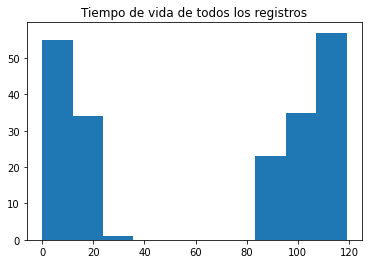

In [58]:
plt.hist(df_unique['vida_util_int'])#, bins=10
plt.title("Tiempo de vida de todos los registros", fontdict=None, loc='center', pad=None,)
plt.show()

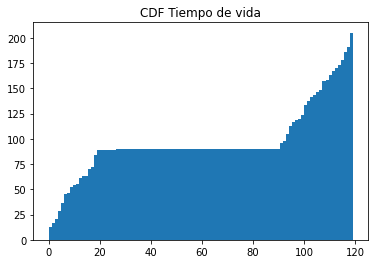

In [59]:
plt.hist(df_unique['vida_util_int'],cumulative=True ,bins=100)#, bins=10
plt.title("CDF Tiempo de vida", fontdict=None, loc='center', pad=None,)
plt.show()

In [60]:
df_last_weak    = df[df.vida_util_restante_int<=7]
df_last_2_weaks = df[df.vida_util_restante_int<=14]
df_last_month   = df[df.vida_util_restante_int<=30]

In [61]:
mean_weak = df_last_weak.mean()
std_weak  = df_last_weak.std()
skew_weak = df_last_weak.skew()

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


In [62]:
mean_2_weaks  = df_last_2_weaks.mean()
std_2_weaks   = df_last_2_weaks.std()
skew_2_weaks  = df_last_2_weaks.skew()

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


In [63]:
mean_month = df_last_month.mean()
std_month  = df_last_month.std()
skew_month = df_last_month.skew()

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


In [64]:
d = {}
A=[]
B=[]
C=[]
L=[]
M=[]
N=[]
X=[]
Y=[]
Z=[]
Indices=[]

for i in mean_month.index:
    if i[:5]=='smart':
        indice=list(mean_month.index).index(i)
        Indices.append(i)
        
        A.append(list(mean_weak.values)[indice])
        B.append(list(mean_2_weaks.values)[indice])
        C.append(list(mean_month.values)[indice])
        
        L.append(list(std_weak.values)[indice])
        M.append(list(std_2_weaks.values)[indice])
        N.append(list(std_month.values)[indice])
        
        X.append(list(skew_weak.values)[indice])
        Y.append(list(skew_2_weaks.values)[indice])
        Z.append(list(skew_month.values)[indice])
        
        
d= {'Indices':Indices,'Mean_Weak':A,'Mean_2_Weak':B,'Mean_Month':C,
    'sd_Weak':L,'sd_2_WeakS':M,'sd_Month':N,'skew_Weak':X,
    'skew_2_Weaks':Y,'skew_Month':Z}

In [65]:
list(mean_month.index)[0]

'capacity_bytes'

In [66]:
stats_smart=pd.DataFrame.from_dict(d)
stats_smart["Coef_Var_Month"] = ((stats_smart['sd_Month'])/(stats_smart['Mean_Month']))

,Indices,Mean_Weak,Mean_2_Weak,Mean_Month,sd_Weak,sd_2_WeakS,sd_Month,skew_Weak,skew_2_Weaks,skew_Month,Coef_Var_Month
0,smart_1_normalized,1.223613e+02,1.232073e+02,1.247454e+02,2.939514e+01,2.981201e+01,3.104438e+01,1.956947,1.927673,1.807867,0.248862
1,smart_1_raw,9.407928e+07,9.381951e+07,9.303253e+07,8.922988e+07,8.688757e+07,8.579798e+07,1.769463,1.348051,1.135799,0.922236
2,smart_2_normalized,1.097759e+02,1.093701e+02,1.101909e+02,1.488885e+01,1.469925e+01,1.502765e+01,0.911507,0.964851,0.823048,0.136378
3,smart_2_raw,3.364943e+01,3.167717e+01,3.420712e+01,5.126716e+01,4.972913e+01,5.047510e+01,0.980345,1.020794,0.867908,1.475573
4,smart_3_normalized,1.030176e+02,1.031084e+02,1.036485e+02,2.043089e+01,1.982938e+01,2.006113e+01,3.005972,2.775647,2.583049,0.193550
...,...,...,...,...,...,...,...,...,...,...,...
81,smart_251_raw,1.638100e+08,1.577985e+08,1.616003e+08,1.416254e+08,1.435319e+08,1.446151e+08,0.281227,0.357692,0.294679,0.894894
82,smart_252_normalized,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
83,smart_252_raw,7.534454e+07,7.256413e+07,7.429088e+07,6.515013e+07,6.600756e+07,6.643993e+07,0.270902,0.347905,0.283681,0.894321
84,smart_254_normalized,1.061538e+02,1.044843e+02,1.028653e+02,2.412450e+01,2.074249e+01,1.670696e+01,3.691786,4.428360,5.675040,0.162416


In [75]:
val_delete=stats_smart[stats_smart.Coef_Var_Month>0.01]

Indices            object
Mean_Weak         float64
Mean_2_Weak       float64
Mean_Month        float64
sd_Weak           float64
sd_2_WeakS        float64
sd_Month          float64
skew_Weak         float64
skew_2_Weaks      float64
skew_Month        float64
Coef_Var_Month    float64
dtype: object

In [67]:
stats_smart = stats_smart.round(1)
columnas_weak_month = stats_smart.columns
stats_smart_sin_nan = stats_smart.dropna(subset=columnas_weak_month)
lista_smart_sin_nans=list(stats_smart_sin_nan['Indices']) 

In [68]:
for i in lista_smart_sin_nans:
    if i in Indices:
        Indices.remove(i)
for i in Indices:
    del df[i]
    del df_unique[i]

In [69]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_252_normalized,smart_252_raw,smart_254_normalized,end_date,start_date,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-17,2016-01-01,16 days,16.0,16 days,16.0,1.0
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,2016-04-18,2016-01-01,108 days,108.0,108 days,108.0,1.0
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-10,2016-01-01,9 days,9.0,9 days,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,2016-04-28,W0Q6KWV8,ST320LT007,1.581370e-312,1,117,147958432,NaN,NaN,98,...,1.0,164262565.0,100.0,2016-04-28,2016-01-01,118 days,118.0,0 days,0.0,0.0
5485,2016-04-28,S300XP36,ST4000DM000,1.976651e-311,1,117,146527232,NaN,NaN,98,...,NaN,NaN,NaN,2016-04-28,2016-01-01,118 days,118.0,0 days,0.0,0.0
5486,2016-04-28,W300T2RC,ST4000DM000,1.976651e-311,1,117,144495808,NaN,NaN,91,...,NaN,NaN,NaN,2016-04-28,2016-01-01,118 days,118.0,0 days,0.0,0.0
5487,2016-04-29,Z302A13D,ST4000DM000,1.976651e-311,1,119,223384952,NaN,NaN,97,...,NaN,NaN,NaN,2016-04-29,2016-01-01,119 days,119.0,0 days,0.0,0.0


/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Indices,Mean_Weak,Mean_2_Weak,Mean_Month,sd_Weak,sd_2_WeakS,sd_Month,skew_Weak,skew_2_Weaks,skew_Month,Coef_Var
0,smart_1_normalized,122.4,123.2,124.7,29.4,29.8,31.0,2.0,1.9,1.8,0.248597
1,smart_1_raw,94079276.7,93819509.0,93032533.5,89229883.8,86887566.5,85797979.4,1.8,1.3,1.1,0.922236
2,smart_2_normalized,109.8,109.4,110.2,14.9,14.7,15.0,0.9,1.0,0.8,0.136116
3,smart_2_raw,33.6,31.7,34.2,51.3,49.7,50.5,1.0,1.0,0.9,1.476608
4,smart_3_normalized,103.0,103.1,103.6,20.4,19.8,20.1,3.0,2.8,2.6,0.194015
...,...,...,...,...,...,...,...,...,...,...,...
81,smart_251_raw,163809953.3,157798512.2,161600304.0,141625441.2,143531861.1,144615098.0,0.3,0.4,0.3,0.894894
82,smart_252_normalized,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
83,smart_252_raw,75344536.0,72564133.7,74290879.5,65150131.2,66007563.5,66439929.3,0.3,0.3,0.3,0.894321
84,smart_254_normalized,106.2,104.5,102.9,24.1,20.7,16.7,3.7,4.4,5.7,0.162293


/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


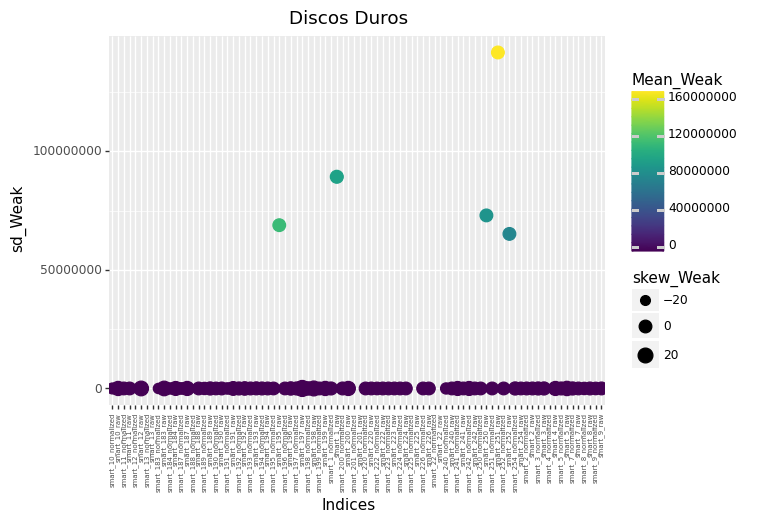

<ggplot: (338046889)>

In [78]:
ggplot(stats_smart, aes(x = "Indices", y = "sd_Weak",color='Mean_Weak',size='skew_Weak'))\
+theme(axis_text_x=element_text(angle=90,size=5))\
+ggtitle("Discos Duros") + geom_point()

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


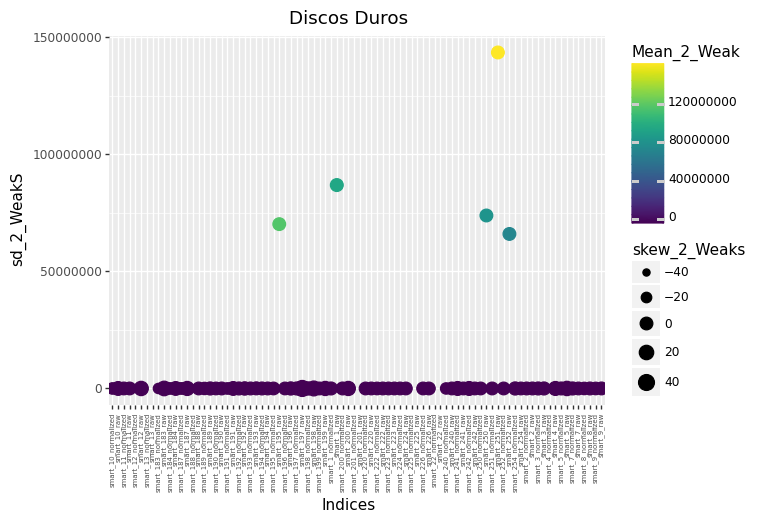

<ggplot: (338339049)>

In [81]:
ggplot(stats_smart, aes(x = "Indices", y = "sd_2_WeakS",color='Mean_2_Weak',size='skew_2_Weaks'))\
+theme(axis_text_x=element_text(angle=90,size=5))\
+ggtitle("Discos Duros") + geom_point()

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


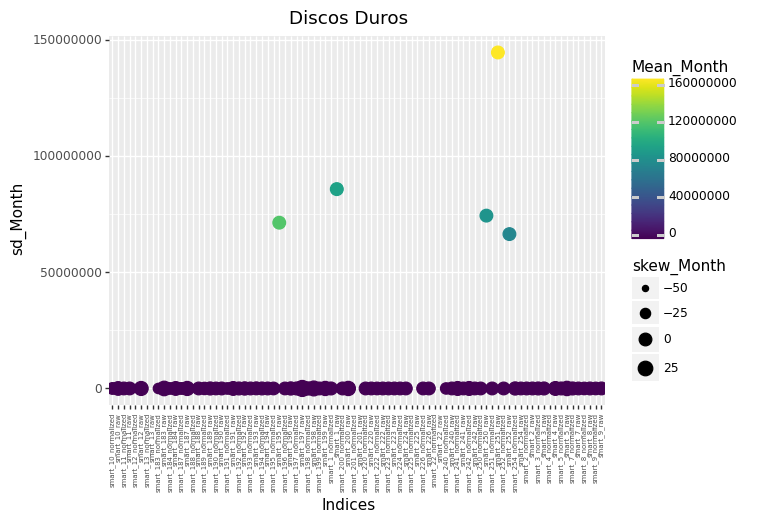

<ggplot: (338022221)>

In [82]:
ggplot(stats_smart, aes(x = "Indices", y = "sd_Month",color='Mean_Month',size='skew_Month'))\
+theme(axis_text_x=element_text(angle=90,size=5))\
+ggtitle("Discos Duros") + geom_point()